In [1]:
# Rquire libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load data set
data = pd.read_csv("/Users/ashraf/Desktop/data_sets/data_clean.csv")

In [3]:
# To look first few records
data.head()

,Unnamed: 0,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
0,1,41.0,190.0,7.4,67,5,1,2010,67,S
1,2,36.0,118.0,8.0,72,5,2,2010,72,C
2,3,12.0,149.0,12.6,74,5,3,2010,74,PS
3,4,18.0,313.0,11.5,62,5,4,2010,62,S
4,5,NaN,NaN,14.3,56,5,5,2010,56,S


In [4]:
data1 = data.copy()

In [5]:
# Unnamed:0 column is not required it just like index 
data1.drop('Unnamed: 0',axis=1,inplace=True)

In [6]:
data1.head(2)

,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
0,41.0,190.0,7.4,67,5,1,2010,67,S
1,36.0,118.0,8.0,72,5,2,2010,72,C


In [7]:
# As we can see above the Temp column repeated twice we also have to drop Temp C column 
data1.drop('Temp C',axis= 1, inplace=True)

In [8]:
# Now let's check info about dataset
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    120 non-null    float64
 1   Solar.R  151 non-null    float64
 2   Wind     158 non-null    float64
 3   Month    158 non-null    object 
 4   Day      158 non-null    int64  
 5   Year     158 non-null    int64  
 6   Temp     158 non-null    int64  
 7   Weather  155 non-null    object 
dtypes: float64(3), int64(3), object(2)
memory usage: 10.0+ KB


As we can clearly see that above there is some missing data and some obeject type Data Type
so we have to treat them, Let's firts correct the dtype

In [9]:
# converting object data type to correct data type
data1['Month'] = pd.to_numeric(data1['Month'],errors="coerce")
data1['Weather'] = data1['Weather'].astype('category')

In [10]:
# Let's againg check the info
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   Ozone    120 non-null    float64 
 1   Solar.R  151 non-null    float64 
 2   Wind     158 non-null    float64 
 3   Month    157 non-null    float64 
 4   Day      158 non-null    int64   
 5   Year     158 non-null    int64   
 6   Temp     158 non-null    int64   
 7   Weather  155 non-null    category
dtypes: category(1), float64(4), int64(3)
memory usage: 9.1 KB


In [11]:
data1.shape

(158, 8)

In [12]:
# let's check for duplicates
data1[data1.duplicated()]

,Ozone,Solar.R,Wind,Month,Day,Year,Temp,Weather
156,14.0,191.0,14.3,9.0,28,2010,75,S


we found one duplicate record we drop it from dataset

In [13]:
# Removing duplicates record from dataset
data2 = data1.drop_duplicates()

In [14]:
data2.shape

(157, 8)

In [15]:
# we check for columns there is some columns with not proper name so we rename it
data2.columns

Index(['Ozone', 'Solar.R', 'Wind', 'Month', 'Day', 'Year', 'Temp', 'Weather'], dtype='object')

In [16]:
data2.rename({'Solar.R':'Solar'},axis=1,inplace=True)

In [17]:
data2.columns

Index(['Ozone', 'Solar', 'Wind', 'Month', 'Day', 'Year', 'Temp', 'Weather'], dtype='object')

In [18]:
# Let's check for null values
data2.isnull().sum()

Ozone      38
Solar       7
Wind        0
Month       1
Day         0
Year        0
Temp        0
Weather     3
dtype: int64

In [19]:
# Missing values and imputation

In [20]:
ozone_mean = data2['Ozone'].mean()

In [21]:
data2['Ozone'] = data2['Ozone'].fillna(ozone_mean)

In [22]:
solar_mean = data2['Solar'].mean()

In [23]:
data2['Solar'] = data2['Solar'].fillna(solar_mean)

In [24]:
month_mean = data2['Month'].mean()

In [25]:
data2['Month'] = data2['Month'].fillna(month_mean)

In [26]:
data2.isnull().sum()

Ozone      0
Solar      0
Wind       0
Month      0
Day        0
Year       0
Temp       0
Weather    3
dtype: int64

In [27]:
# Let's fillna for categorical variable

In [28]:
obje_column = data2['Weather']

In [29]:
mode_value = data2['Weather'].mode()[0]

In [30]:
data2['Weather'] = data2['Weather'].fillna(mode_value)

In [31]:
data2.isnull().sum()

Ozone      0
Solar      0
Wind       0
Month      0
Day        0
Year       0
Temp       0
Weather    0
dtype: int64

In [32]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 157 entries, 0 to 157
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   Ozone    157 non-null    float64 
 1   Solar    157 non-null    float64 
 2   Wind     157 non-null    float64 
 3   Month    157 non-null    float64 
 4   Day      157 non-null    int64   
 5   Year     157 non-null    int64   
 6   Temp     157 non-null    int64   
 7   Weather  157 non-null    category
dtypes: category(1), float64(4), int64(3)
memory usage: 10.1 KB


In [33]:
# we can clearly see that no misisng values and data types also correct

In [34]:
# descriptive statistics
data2.describe()

,Ozone,Solar,Wind,Month,Day,Year,Temp
count,157.000000,157.000000,157.000000,157.000000,157.000000,157.0,157.000000
mean,41.815126,185.366667,9.929936,7.032051,15.929936,2010.0,77.745223
std,28.404353,86.998999,3.505188,1.425140,8.974404,0.0,9.405334
min,1.000000,7.000000,1.700000,5.000000,1.000000,2010.0,56.000000
25%,21.000000,127.000000,7.400000,6.000000,8.000000,2010.0,72.000000
50%,41.815126,193.000000,9.700000,7.000000,16.000000,2010.0,79.000000
75%,45.000000,255.000000,11.500000,8.000000,24.000000,2010.0,84.000000
max,168.000000,334.000000,20.700000,9.000000,31.000000,2010.0,97.000000


In [35]:
# Outliers Detection

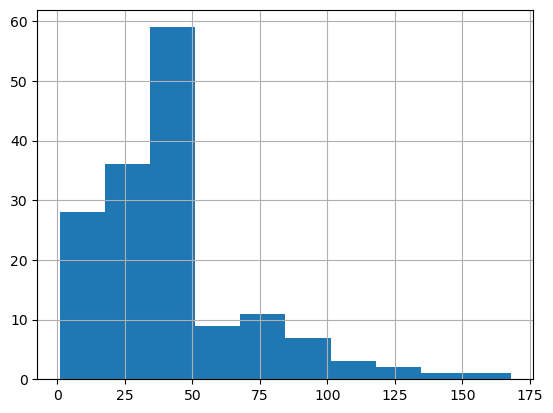

In [36]:
# Histogram plot
data2['Ozone'].hist()
plt.show()

<Axes: >

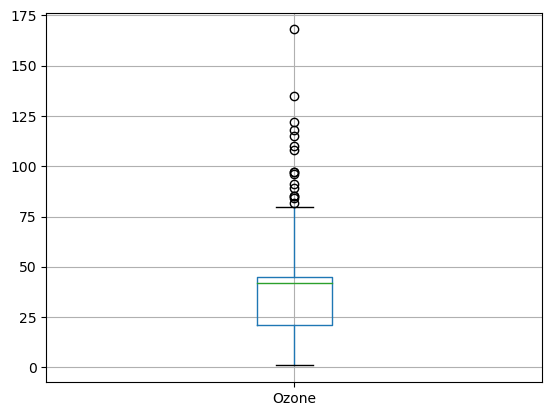

In [37]:
data2.boxplot(column=['Ozone'])

As we can see above there is lot's of outliers in Ozone

<Axes: >

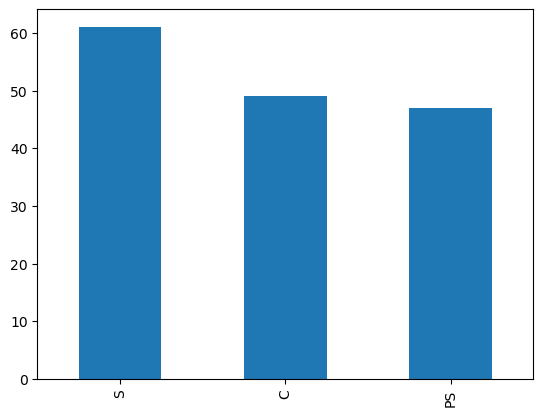

In [38]:
# Bar plot
data2['Weather'].value_counts().plot.bar()

In [39]:
# Scatter plot and correlation analysis

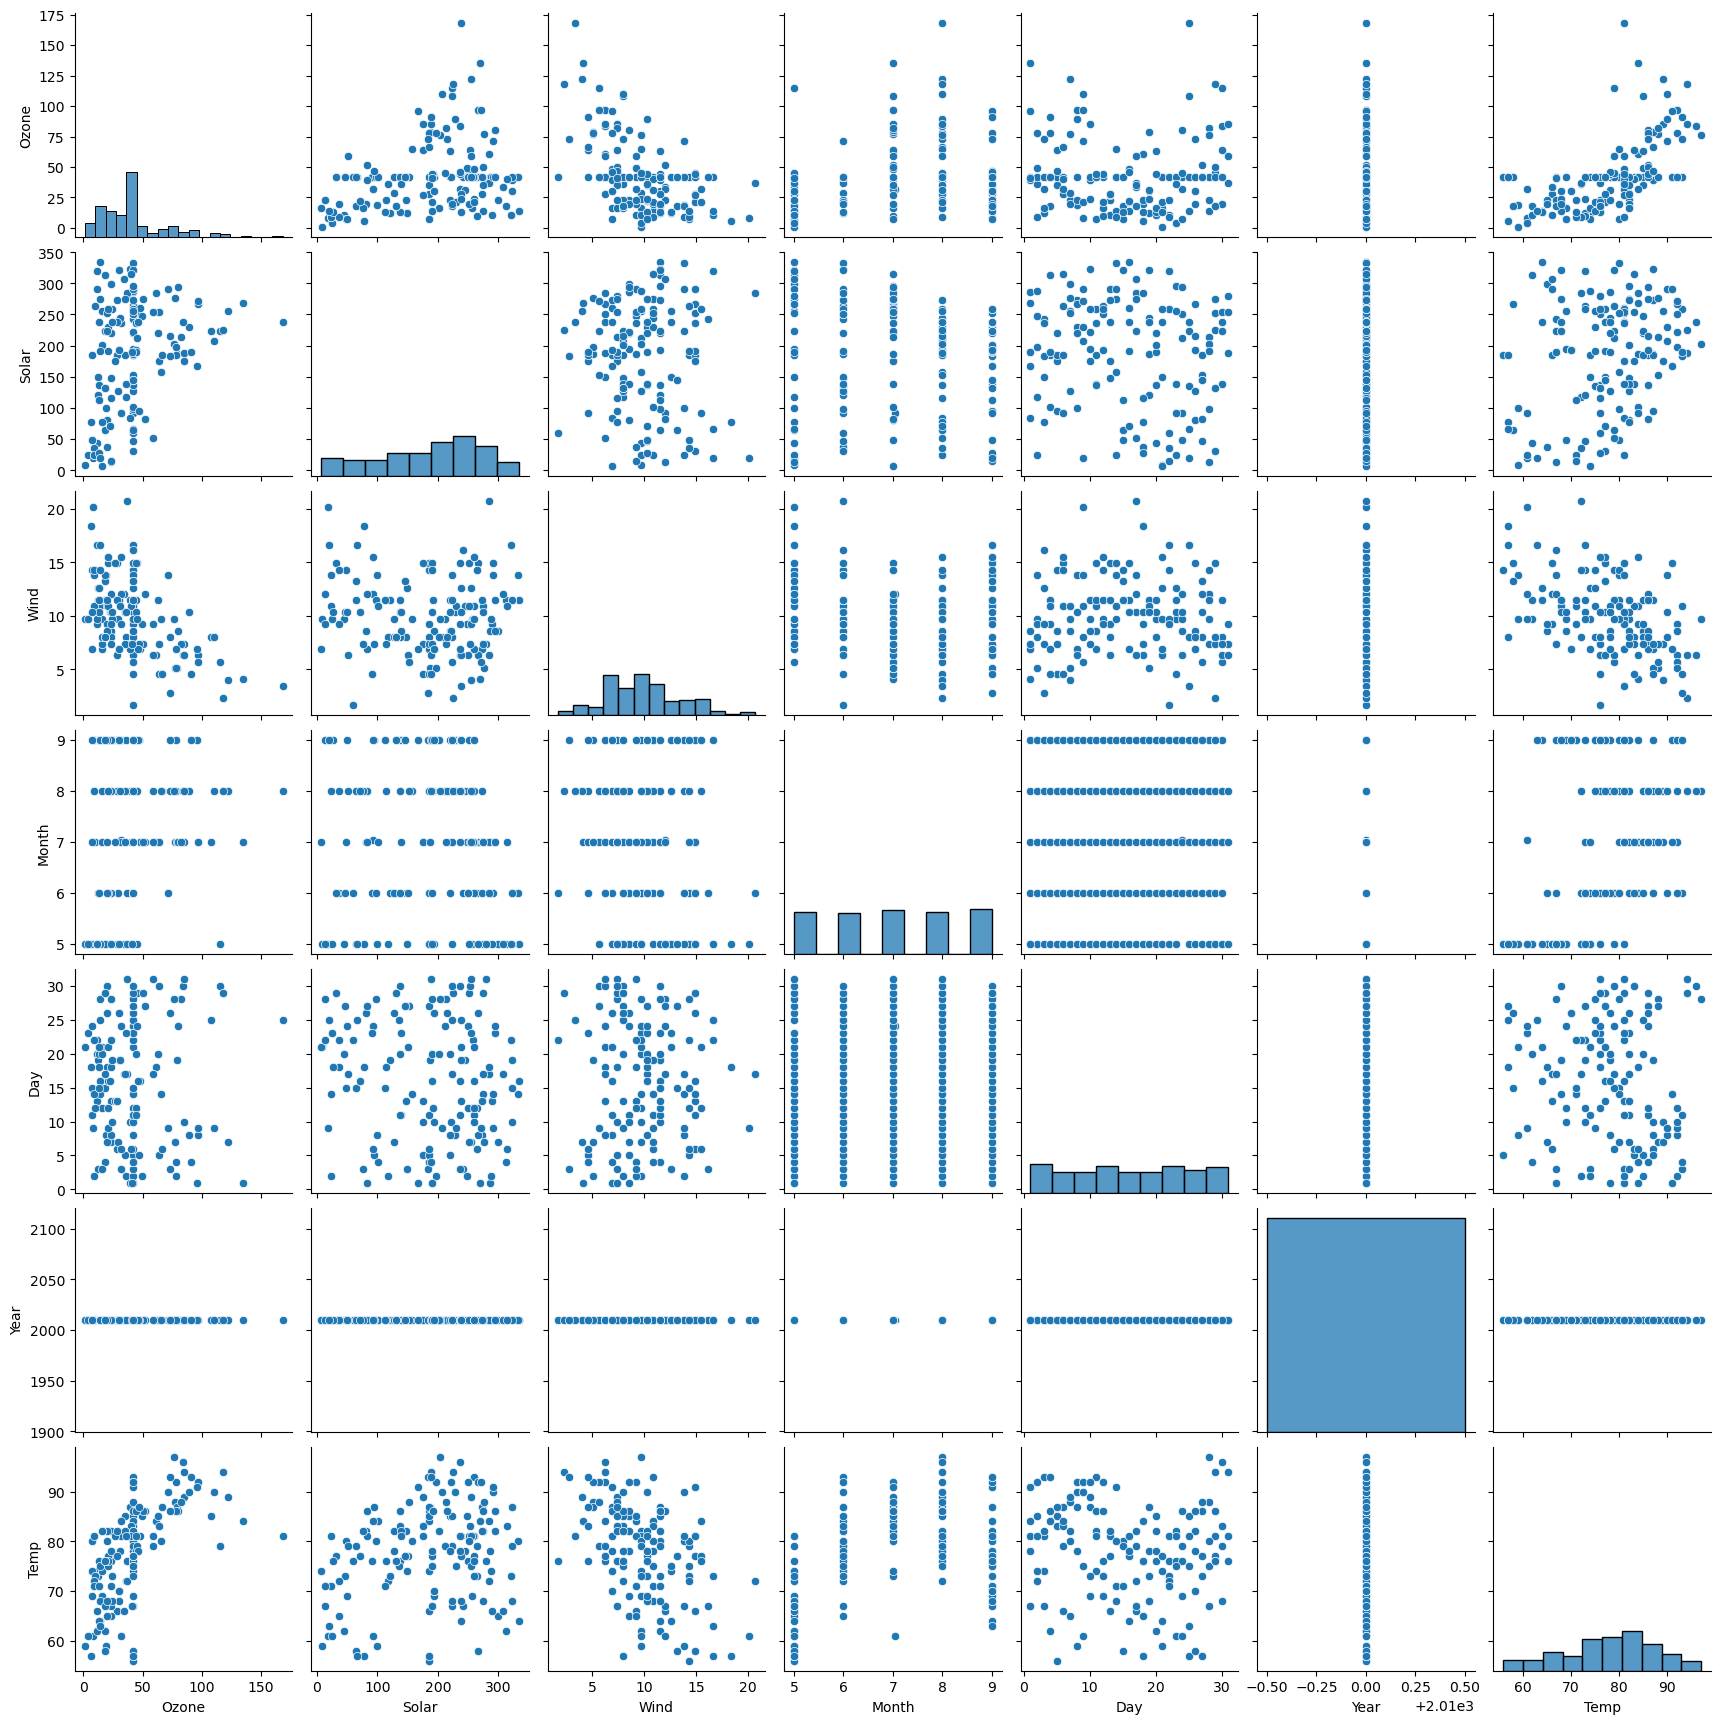

In [40]:
sns.pairplot(data2)

In [41]:
data2.corr()

,Ozone,Solar,Wind,Month,Day,Year,Temp
Ozone,1.000000,0.304559,-0.520004,0.132809,-0.021916,NaN,0.606500
Solar,0.304559,1.000000,-0.055874,-0.090564,-0.151007,NaN,0.260677
Wind,-0.520004,-0.055874,1.000000,-0.166029,0.029900,NaN,-0.441228
Month,0.132809,-0.090564,-0.166029,1.000000,0.049924,NaN,0.394420
Day,-0.021916,-0.151007,0.029900,0.049924,1.000000,NaN,-0.122787
Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temp,0.606500,0.260677,-0.441228,0.394420,-0.122787,NaN,1.000000


# Transformation

## Dummy variable

In [42]:
data3 = pd.get_dummies(data2,columns=['Weather'])

In [43]:
data3

,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather_C,Weather_PS,Weather_S
0,41.000000,190.000000,7.4,5.0,1,2010,67,0,0,1
1,36.000000,118.000000,8.0,5.0,2,2010,72,1,0,0
2,12.000000,149.000000,12.6,5.0,3,2010,74,0,1,0
3,18.000000,313.000000,11.5,5.0,4,2010,62,0,0,1
4,41.815126,185.366667,14.3,5.0,5,2010,56,0,0,1
...,...,...,...,...,...,...,...,...,...,...
152,20.000000,223.000000,11.5,9.0,30,2010,68,0,0,1
153,41.000000,190.000000,7.4,5.0,1,2010,67,1,0,0
154,30.000000,193.000000,6.9,9.0,26,2010,70,0,1,0
155,41.815126,145.000000,13.2,9.0,27,2010,77,0,0,1


# Removing Scaling Effect

In [44]:
# Normalization of the data
from numpy import set_printoptions
from sklearn.preprocessing import MinMaxScaler

In [45]:
array = data3.values

scaler = MinMaxScaler()
rescaled = scaler.fit_transform(array[:,0:5])

#Transformed data
set_printoptions(precision=2)
print(rescaled[0:5,:])

[[0.24 0.56 0.3  0.   0.  ]
 [0.21 0.34 0.33 0.   0.03]
 [0.07 0.43 0.57 0.   0.07]
 [0.1  0.94 0.52 0.   0.1 ]
 [0.24 0.55 0.66 0.   0.13]]


In [46]:
# Standardiza data

In [47]:
from sklearn.preprocessing import StandardScaler

In [48]:
std_scaler = StandardScaler()
std_scaled_data = std_scaler.fit_transform(array[:,0:5])

set_printoptions(precision=2)
print(std_scaled_data[0:5,:])

[[-0.03  0.05 -0.72 -1.43 -1.67]
 [-0.21 -0.78 -0.55 -1.43 -1.56]
 [-1.05 -0.42  0.76 -1.43 -1.45]
 [-0.84  1.47  0.45 -1.43 -1.33]
 [ 0.    0.    1.25 -1.43 -1.22]]
